In [22]:
import pandas as pd 
import numpy as np          
import matplotlib.pyplot as plt   
from datetime import datetime    
from pandas import Series        
%matplotlib inline 
import warnings                   
warnings.filterwarnings("ignore")

In [2]:
long_data=pd.read_csv('long_data_.csv')

In [3]:
long_data

,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,NR,31.519974,75.980003,02/01/2019 00:00:00,119.9
1,Haryana,NR,28.450006,77.019991,02/01/2019 00:00:00,130.3
2,Rajasthan,NR,26.449999,74.639981,02/01/2019 00:00:00,234.1
3,Delhi,NR,28.669993,77.230004,02/01/2019 00:00:00,85.8
4,UP,NR,27.599981,78.050006,02/01/2019 00:00:00,313.9
...,...,...,...,...,...,...
16594,Manipur,NER,24.799971,93.950017,05/12/2020 00:00:00,2.5
16595,Meghalaya,NER,25.570492,91.880014,05/12/2020 00:00:00,5.8
16596,Mizoram,NER,23.710399,92.720015,05/12/2020 00:00:00,1.6
16597,Nagaland,NER,25.666998,94.116570,05/12/2020 00:00:00,2.1


In [33]:
long_data['Dates']=pd.to_datetime(long_data['Dates'])

In [34]:
long_data['year']=long_data.Dates.dt.strftime('%Y')
long_data['month']=long_data.Dates.dt.month 
long_data['day']=long_data.Dates.dt.day    
long_data['Hour']=long_data.Dates.dt.hour

In [35]:
long_data

,States,Regions,latitude,longitude,Dates,Usage,year,month,day,Hour
0,Punjab,NR,31.519974,75.980003,2019-02-01,119.9,2019,2,1,0
1,Haryana,NR,28.450006,77.019991,2019-02-01,130.3,2019,2,1,0
2,Rajasthan,NR,26.449999,74.639981,2019-02-01,234.1,2019,2,1,0
3,Delhi,NR,28.669993,77.230004,2019-02-01,85.8,2019,2,1,0
4,UP,NR,27.599981,78.050006,2019-02-01,313.9,2019,2,1,0
...,...,...,...,...,...,...,...,...,...,...
16594,Manipur,NER,24.799971,93.950017,2020-05-12,2.5,2020,5,12,0
16595,Meghalaya,NER,25.570492,91.880014,2020-05-12,5.8,2020,5,12,0
16596,Mizoram,NER,23.710399,92.720015,2020-05-12,1.6,2020,5,12,0
16597,Nagaland,NER,25.666998,94.116570,2020-05-12,2.1,2020,5,12,0


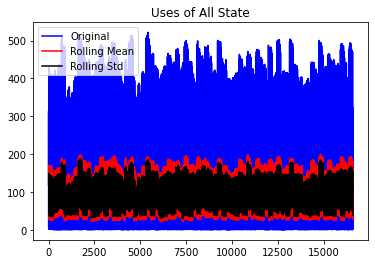

Results of dickey fuller test
Test Statistics               -5.932323e+00
p-value                        2.364620e-07
No. of lags used               4.400000e+01
Number of observations used    1.655400e+04
critical value (1%)           -3.430745e+00
critical value (5%)           -2.861715e+00
critical value (10%)          -2.566863e+00
dtype: float64


In [68]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries,state):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Uses of '+state)
    plt.show(block=False)
    
    #perform dickey fuller test  
    print("Results of dickey fuller test")
    adft = adfuller(long_data['Usage'],autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(long_data.Usage,'All State')

In [8]:
dataset=pd.read_csv('dataset_tk.csv')

In [9]:
dataset

,Unnamed: 0,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,02/01/2019 00:00:00,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,03/01/2019 00:00:00,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,04/01/2019 00:00:00,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
3,05/01/2019 00:00:00,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
4,06/01/2019 00:00:00,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,01/12/2020 00:00:00,130.8,126.0,220.4,77.3,322.8,36.5,25.4,45.4,3.6,...,105.7,172.6,1.4,2.1,20.4,2.1,5.4,1.8,2.0,2.4
499,02/12/2020 00:00:00,129.4,127.3,218.4,81.3,331.4,37.0,25.8,45.2,3.7,...,112.3,174.4,1.5,2.1,23.3,2.4,5.4,1.6,2.1,3.3
500,03/12/2020 00:00:00,132.1,129.7,205.6,85.6,336.7,37.8,26.2,45.2,4.0,...,113.0,169.8,1.4,2.1,21.7,2.3,5.4,1.5,2.0,3.6
501,04/12/2020 00:00:00,132.1,128.4,207.0,83.9,334.6,38.2,27.0,43.0,4.0,...,111.6,145.5,1.2,2.0,24.2,2.5,5.7,1.6,2.0,3.3


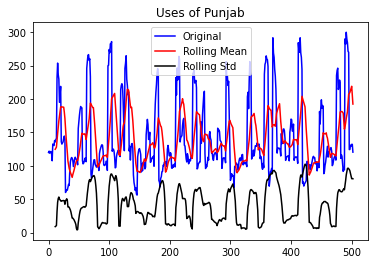

Results of dickey fuller test
Test Statistics               -5.932323e+00
p-value                        2.364620e-07
No. of lags used               4.400000e+01
Number of observations used    1.655400e+04
critical value (1%)           -3.430745e+00
critical value (5%)           -2.861715e+00
critical value (10%)          -2.566863e+00
dtype: float64


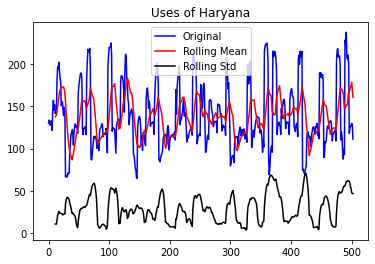

Results of dickey fuller test
Test Statistics               -5.932323e+00
p-value                        2.364620e-07
No. of lags used               4.400000e+01
Number of observations used    1.655400e+04
critical value (1%)           -3.430745e+00
critical value (5%)           -2.861715e+00
critical value (10%)          -2.566863e+00
dtype: float64


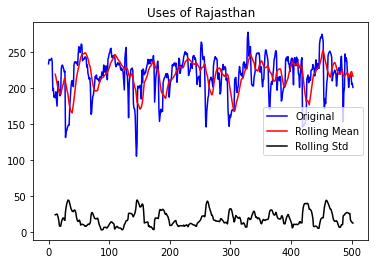

Results of dickey fuller test
Test Statistics               -5.932323e+00
p-value                        2.364620e-07
No. of lags used               4.400000e+01
Number of observations used    1.655400e+04
critical value (1%)           -3.430745e+00
critical value (5%)           -2.861715e+00
critical value (10%)          -2.566863e+00
dtype: float64


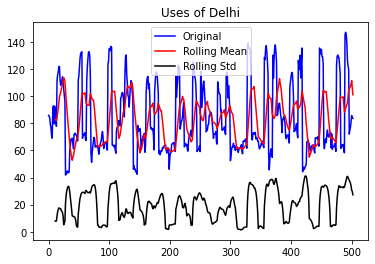

Results of dickey fuller test
Test Statistics               -5.932323e+00
p-value                        2.364620e-07
No. of lags used               4.400000e+01
Number of observations used    1.655400e+04
critical value (1%)           -3.430745e+00
critical value (5%)           -2.861715e+00
critical value (10%)          -2.566863e+00
dtype: float64


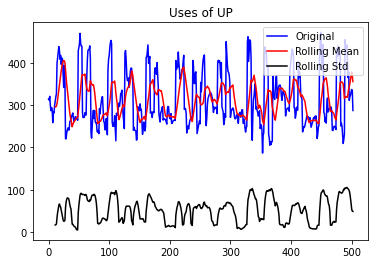

Results of dickey fuller test
Test Statistics               -5.932323e+00
p-value                        2.364620e-07
No. of lags used               4.400000e+01
Number of observations used    1.655400e+04
critical value (1%)           -3.430745e+00
critical value (5%)           -2.861715e+00
critical value (10%)          -2.566863e+00
dtype: float64


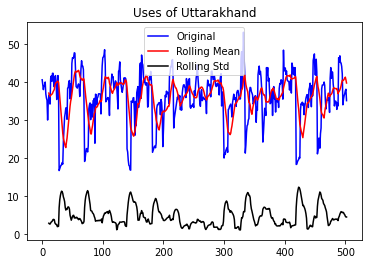

Results of dickey fuller test
Test Statistics               -5.932323e+00
p-value                        2.364620e-07
No. of lags used               4.400000e+01
Number of observations used    1.655400e+04
critical value (1%)           -3.430745e+00
critical value (5%)           -2.861715e+00
critical value (10%)          -2.566863e+00
dtype: float64


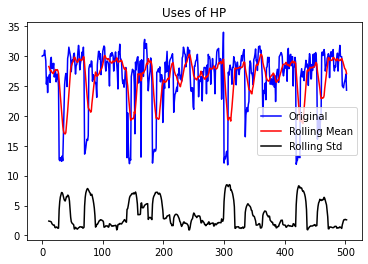

Results of dickey fuller test
Test Statistics               -5.932323e+00
p-value                        2.364620e-07
No. of lags used               4.400000e+01
Number of observations used    1.655400e+04
critical value (1%)           -3.430745e+00
critical value (5%)           -2.861715e+00
critical value (10%)          -2.566863e+00
dtype: float64


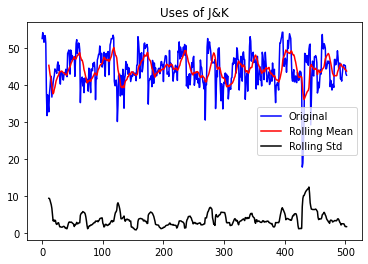

Results of dickey fuller test
Test Statistics               -5.932323e+00
p-value                        2.364620e-07
No. of lags used               4.400000e+01
Number of observations used    1.655400e+04
critical value (1%)           -3.430745e+00
critical value (5%)           -2.861715e+00
critical value (10%)          -2.566863e+00
dtype: float64


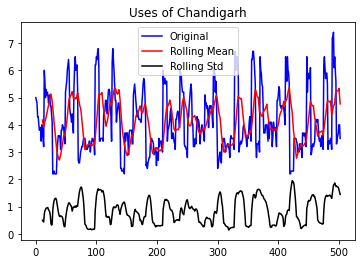

Results of dickey fuller test
Test Statistics               -5.932323e+00
p-value                        2.364620e-07
No. of lags used               4.400000e+01
Number of observations used    1.655400e+04
critical value (1%)           -3.430745e+00
critical value (5%)           -2.861715e+00
critical value (10%)          -2.566863e+00
dtype: float64


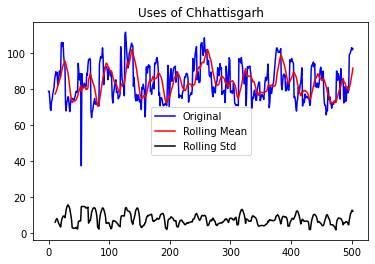

Results of dickey fuller test
Test Statistics               -5.932323e+00
p-value                        2.364620e-07
No. of lags used               4.400000e+01
Number of observations used    1.655400e+04
critical value (1%)           -3.430745e+00
critical value (5%)           -2.861715e+00
critical value (10%)          -2.566863e+00
dtype: float64


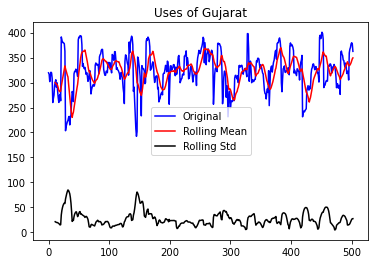

Results of dickey fuller test
Test Statistics               -5.932323e+00
p-value                        2.364620e-07
No. of lags used               4.400000e+01
Number of observations used    1.655400e+04
critical value (1%)           -3.430745e+00
critical value (5%)           -2.861715e+00
critical value (10%)          -2.566863e+00
dtype: float64


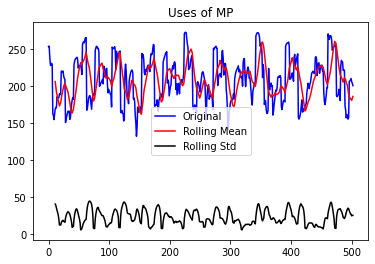

Results of dickey fuller test
Test Statistics               -5.932323e+00
p-value                        2.364620e-07
No. of lags used               4.400000e+01
Number of observations used    1.655400e+04
critical value (1%)           -3.430745e+00
critical value (5%)           -2.861715e+00
critical value (10%)          -2.566863e+00
dtype: float64


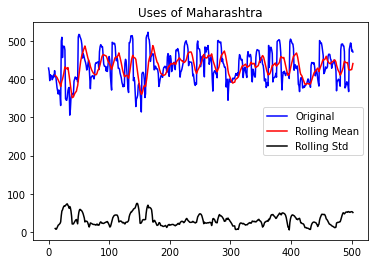

Results of dickey fuller test
Test Statistics               -5.932323e+00
p-value                        2.364620e-07
No. of lags used               4.400000e+01
Number of observations used    1.655400e+04
critical value (1%)           -3.430745e+00
critical value (5%)           -2.861715e+00
critical value (10%)          -2.566863e+00
dtype: float64


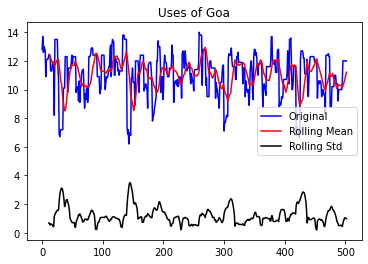

Results of dickey fuller test
Test Statistics               -5.932323e+00
p-value                        2.364620e-07
No. of lags used               4.400000e+01
Number of observations used    1.655400e+04
critical value (1%)           -3.430745e+00
critical value (5%)           -2.861715e+00
critical value (10%)          -2.566863e+00
dtype: float64


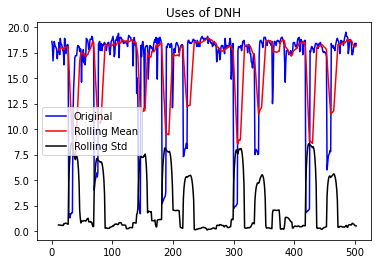

Results of dickey fuller test
Test Statistics               -5.932323e+00
p-value                        2.364620e-07
No. of lags used               4.400000e+01
Number of observations used    1.655400e+04
critical value (1%)           -3.430745e+00
critical value (5%)           -2.861715e+00
critical value (10%)          -2.566863e+00
dtype: float64


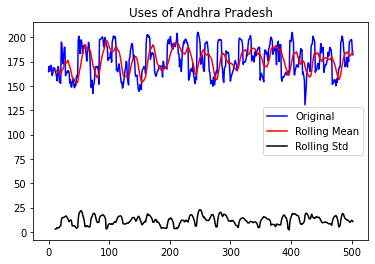

Results of dickey fuller test
Test Statistics               -5.932323e+00
p-value                        2.364620e-07
No. of lags used               4.400000e+01
Number of observations used    1.655400e+04
critical value (1%)           -3.430745e+00
critical value (5%)           -2.861715e+00
critical value (10%)          -2.566863e+00
dtype: float64


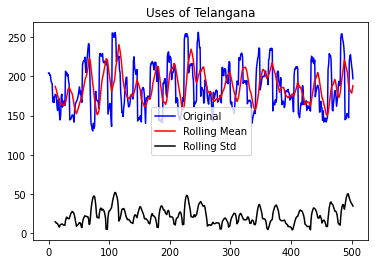

Results of dickey fuller test
Test Statistics               -5.932323e+00
p-value                        2.364620e-07
No. of lags used               4.400000e+01
Number of observations used    1.655400e+04
critical value (1%)           -3.430745e+00
critical value (5%)           -2.861715e+00
critical value (10%)          -2.566863e+00
dtype: float64


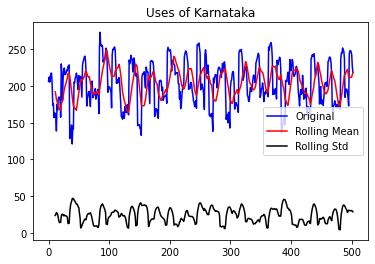

Results of dickey fuller test
Test Statistics               -5.932323e+00
p-value                        2.364620e-07
No. of lags used               4.400000e+01
Number of observations used    1.655400e+04
critical value (1%)           -3.430745e+00
critical value (5%)           -2.861715e+00
critical value (10%)          -2.566863e+00
dtype: float64


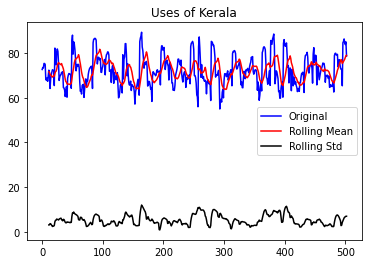

Results of dickey fuller test
Test Statistics               -5.932323e+00
p-value                        2.364620e-07
No. of lags used               4.400000e+01
Number of observations used    1.655400e+04
critical value (1%)           -3.430745e+00
critical value (5%)           -2.861715e+00
critical value (10%)          -2.566863e+00
dtype: float64


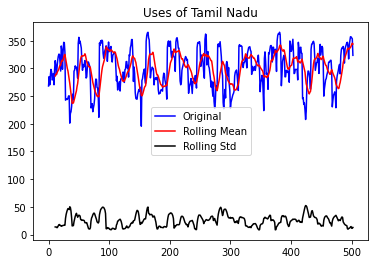

Results of dickey fuller test
Test Statistics               -5.932323e+00
p-value                        2.364620e-07
No. of lags used               4.400000e+01
Number of observations used    1.655400e+04
critical value (1%)           -3.430745e+00
critical value (5%)           -2.861715e+00
critical value (10%)          -2.566863e+00
dtype: float64


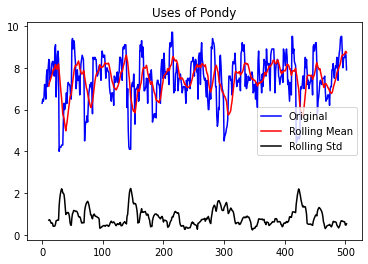

Results of dickey fuller test
Test Statistics               -5.932323e+00
p-value                        2.364620e-07
No. of lags used               4.400000e+01
Number of observations used    1.655400e+04
critical value (1%)           -3.430745e+00
critical value (5%)           -2.861715e+00
critical value (10%)          -2.566863e+00
dtype: float64


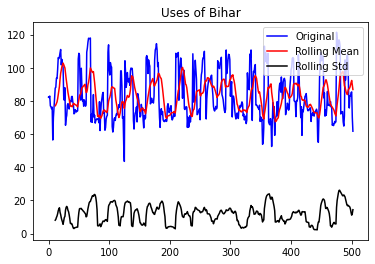

Results of dickey fuller test
Test Statistics               -5.932323e+00
p-value                        2.364620e-07
No. of lags used               4.400000e+01
Number of observations used    1.655400e+04
critical value (1%)           -3.430745e+00
critical value (5%)           -2.861715e+00
critical value (10%)          -2.566863e+00
dtype: float64


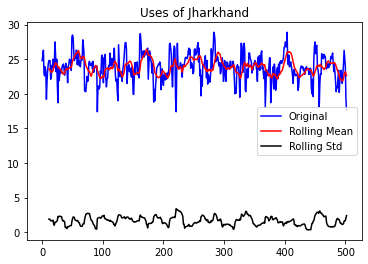

Results of dickey fuller test
Test Statistics               -5.932323e+00
p-value                        2.364620e-07
No. of lags used               4.400000e+01
Number of observations used    1.655400e+04
critical value (1%)           -3.430745e+00
critical value (5%)           -2.861715e+00
critical value (10%)          -2.566863e+00
dtype: float64


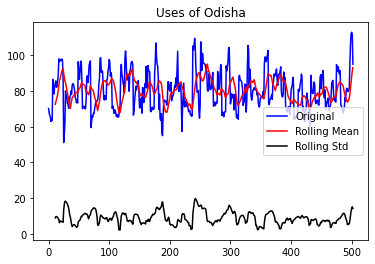

Results of dickey fuller test
Test Statistics               -5.932323e+00
p-value                        2.364620e-07
No. of lags used               4.400000e+01
Number of observations used    1.655400e+04
critical value (1%)           -3.430745e+00
critical value (5%)           -2.861715e+00
critical value (10%)          -2.566863e+00
dtype: float64


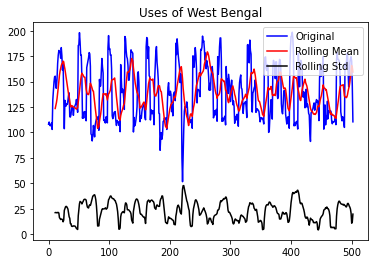

Results of dickey fuller test
Test Statistics               -5.932323e+00
p-value                        2.364620e-07
No. of lags used               4.400000e+01
Number of observations used    1.655400e+04
critical value (1%)           -3.430745e+00
critical value (5%)           -2.861715e+00
critical value (10%)          -2.566863e+00
dtype: float64


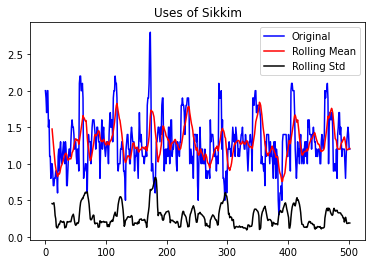

Results of dickey fuller test
Test Statistics               -5.932323e+00
p-value                        2.364620e-07
No. of lags used               4.400000e+01
Number of observations used    1.655400e+04
critical value (1%)           -3.430745e+00
critical value (5%)           -2.861715e+00
critical value (10%)          -2.566863e+00
dtype: float64


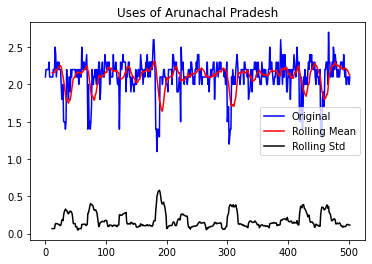

Results of dickey fuller test
Test Statistics               -5.932323e+00
p-value                        2.364620e-07
No. of lags used               4.400000e+01
Number of observations used    1.655400e+04
critical value (1%)           -3.430745e+00
critical value (5%)           -2.861715e+00
critical value (10%)          -2.566863e+00
dtype: float64


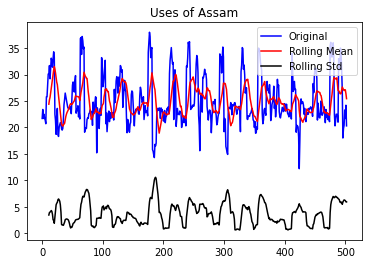

Results of dickey fuller test
Test Statistics               -5.932323e+00
p-value                        2.364620e-07
No. of lags used               4.400000e+01
Number of observations used    1.655400e+04
critical value (1%)           -3.430745e+00
critical value (5%)           -2.861715e+00
critical value (10%)          -2.566863e+00
dtype: float64


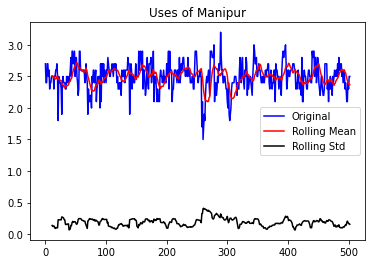

Results of dickey fuller test
Test Statistics               -5.932323e+00
p-value                        2.364620e-07
No. of lags used               4.400000e+01
Number of observations used    1.655400e+04
critical value (1%)           -3.430745e+00
critical value (5%)           -2.861715e+00
critical value (10%)          -2.566863e+00
dtype: float64


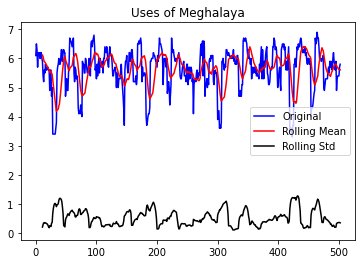

Results of dickey fuller test
Test Statistics               -5.932323e+00
p-value                        2.364620e-07
No. of lags used               4.400000e+01
Number of observations used    1.655400e+04
critical value (1%)           -3.430745e+00
critical value (5%)           -2.861715e+00
critical value (10%)          -2.566863e+00
dtype: float64


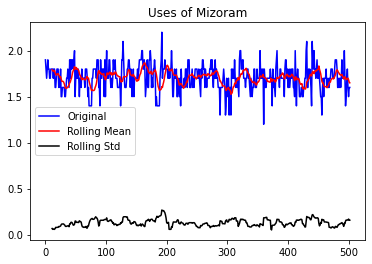

Results of dickey fuller test
Test Statistics               -5.932323e+00
p-value                        2.364620e-07
No. of lags used               4.400000e+01
Number of observations used    1.655400e+04
critical value (1%)           -3.430745e+00
critical value (5%)           -2.861715e+00
critical value (10%)          -2.566863e+00
dtype: float64


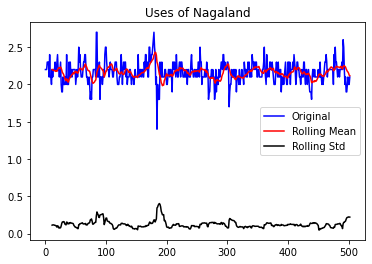

Results of dickey fuller test
Test Statistics               -5.932323e+00
p-value                        2.364620e-07
No. of lags used               4.400000e+01
Number of observations used    1.655400e+04
critical value (1%)           -3.430745e+00
critical value (5%)           -2.861715e+00
critical value (10%)          -2.566863e+00
dtype: float64


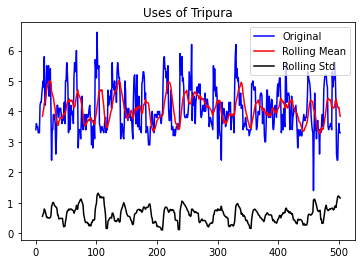

Results of dickey fuller test
Test Statistics               -5.932323e+00
p-value                        2.364620e-07
No. of lags used               4.400000e+01
Number of observations used    1.655400e+04
critical value (1%)           -3.430745e+00
critical value (5%)           -2.861715e+00
critical value (10%)          -2.566863e+00
dtype: float64


In [69]:
for i in dataset.columns:
    if i!='Unnamed: 0':
        test_stationarity(dataset[i],i)
        